In [1]:
import cmocean as cmo
import matplotlib.pyplot as plt
import matplotlib as mpl
import xarray as xr
from matplotlib.gridspec import GridSpec
from matplotlib.gridspec import GridSpecFromSubplotSpec
from matplotlib.lines import Line2D
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.io as sio
import seaborn as sns
import pylab as pl
import warnings
import xarray as xr
warnings.filterwarnings('ignore')
from xmitgcm import open_mdsdataset
import seawater as sw
import cartopy
import cartopy.mpl.geoaxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
def loadNetCDFs(varname):
    dsw=[]
    dsn=[]
    for i in np.arange(0,8,1):
        
        if varname=='DYNVARS':
            pathn='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL/01_noSVB_febTS/'+ str(varname)+'noSVB'+ str(2+i)+'_'+ str(3+i) +'.nc'
            pathw='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL_SVB/01_SVB_febTS/'+ str(varname)+'withSVB'+ str(2+i)+'_'+ str(3+i) +'.nc'
        else:
            pathn='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL/01b_noSVB_febTS/'+ str(varname)+'noSVB'+ str(2+i)+'_'+ str(3+i) +'.nc'
            pathw='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL_SVB/01b_SVB_febTS/'+ str(varname)+'withSVB'+ str(2+i)+'_'+ str(3+i) +'.nc'
        
        dswin  = xr.open_dataset(pathw)
        dsnin = xr.open_dataset(pathn)
        
        dsw.append(dswin)
        dsn.append(dsnin)
        
    return dsw, dsn

In [3]:
dsw,dsn=loadNetCDFs('PHIHYD')

In [4]:
levels=[1,   2,  3,  4,  5,  6,  7,  8,  9, 10, 
          11, 12, 13, 14, 15, 16, 17,
          18, 19, 20, 21, 22, 23, 24, 25,
          26, 27, 28, 29, 30, 31,
          32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44,
          45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57,              
          58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 
          74, 79, 84, 89, 94, 99,]

data_dirWITH= '/media/amelia/Trillian/SVB/exp06_512x612x100_ORL_SVB/01_SVB_febTS/'
dswr=open_mdsdataset(data_dirWITH,data_dirWITH,prefix=['rhoRef'],default_dtype='>f4',levels=levels)


In [5]:
LAT=dsw[0].YC
LON=dsw[0].XC-360
Z = dsw[0].Z
hFacC = dsw[0].hFacC

hfa = np.ma.masked_values(hFacC[0,:,:], 0)
mask = np.ma.getmask(hfa)
        
depth=dsw[0].Depth
depthno=dsn[0].Depth
rho=dswr.rhoRef

In [6]:
file = sio.loadmat('N2_lin.mat')
N2 = file['N2']
z=np.arange(0,-3500,-10)

In [7]:
varname='WVEL'
i=1
pathn='/media/amelia/Trillian/SVB/exp06_512x612x100_ORL/01_noSVB_febTS/'+ str(varname)+'ACnoSVBdep55'+ str(2+i)+'_'+ str(3+i) +'all.nc'
ds  = xr.open_dataset(pathn)
lon_ac=ds.lonAC
lat_ac=ds.latAC
distac=ds.x

In [8]:
dset = xr.open_dataset("/media/amelia/Trillian/SVB/exp06_512x612x100_ORL_SVB/01_SVB_febTS/ETAwithSVBACall.nc")
lat_acet=dset.latAC
lon_acet=dset.lonAC
distacet=dset.x

###### For report

In [9]:
params = {'font.size': 16,
          'figure.figsize': (14, 8),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

###### For presentation

In [10]:
params = {'font.size': 24,
          'figure.figsize': (18, 11),
         'font.family':'sans'}
pl.rcParams.update(params)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [27]:
ind_lon=[ -115.11813068276555, -115.939167,-116.605833,-117.1625,-118.24368,-119.714167,-120.471439, -120.7586085906775]
ind_lat=[27.850440699318973,30.556389,31.857778,32.715,34.05223,34.425833,34.448113,35.17364705813524]

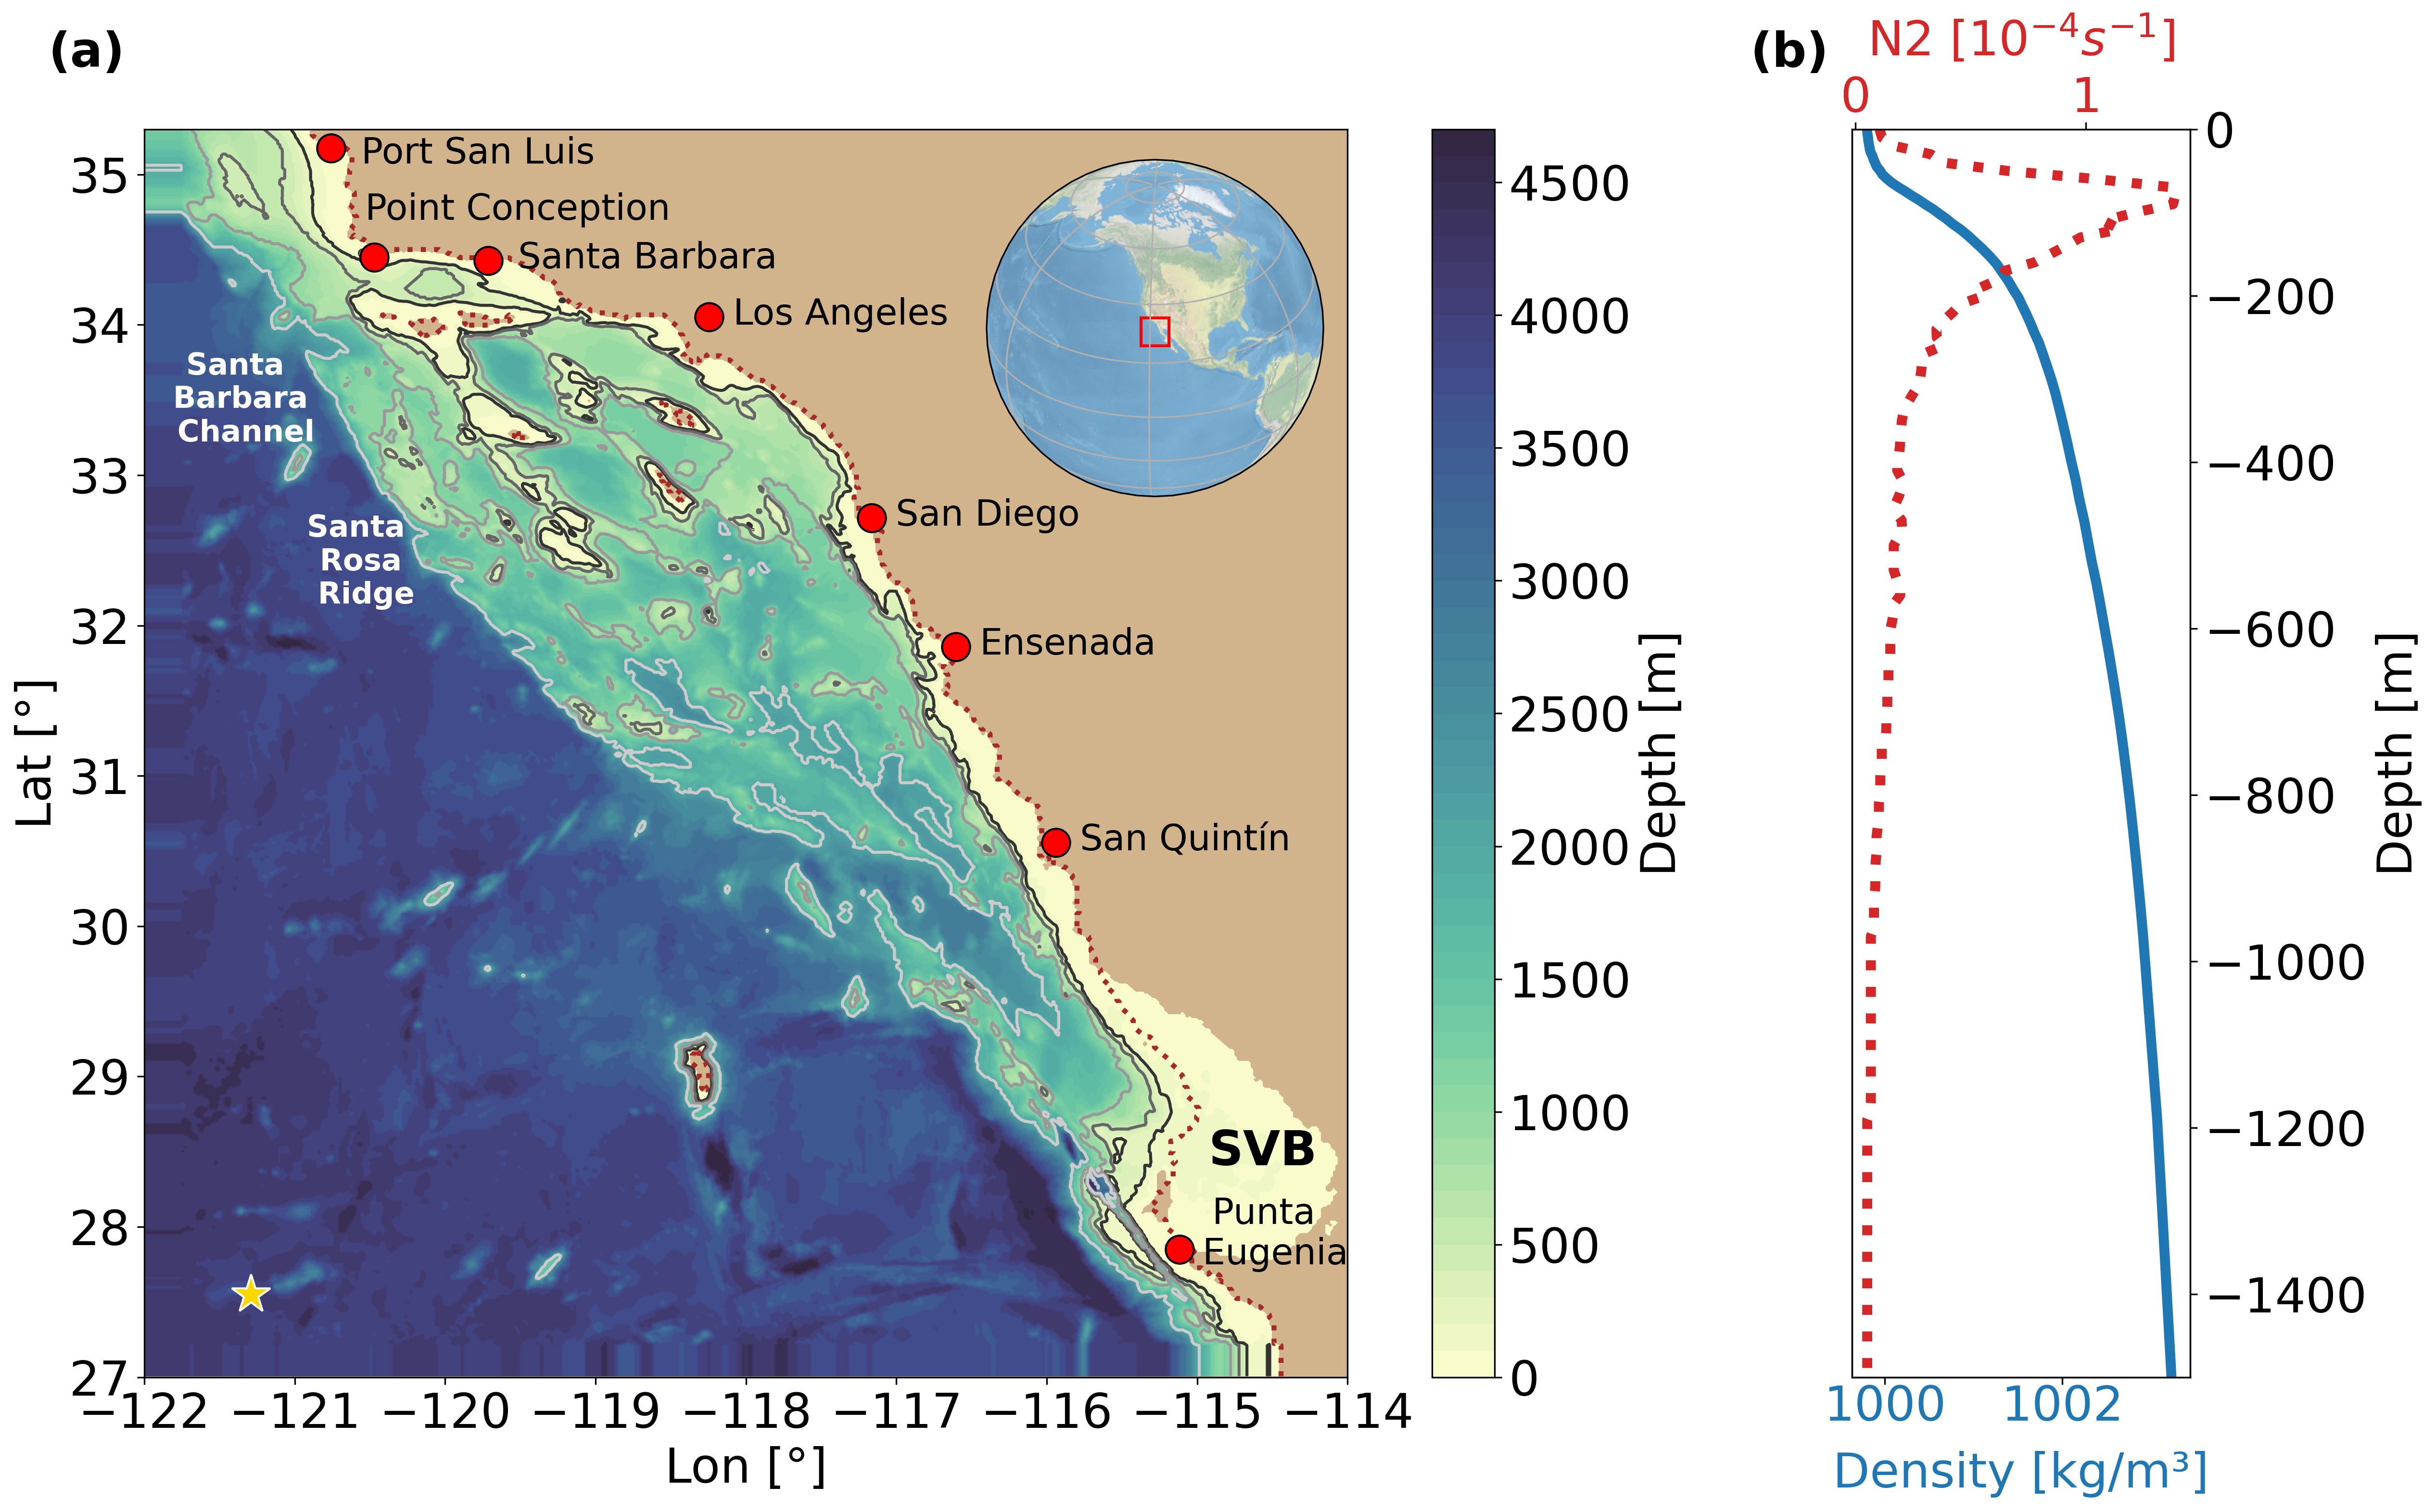

In [43]:
fig = plt.figure()
gs = GridSpec(nrows=2, ncols=2, width_ratios=[2.5,0.5])

#ax1 = fig.add_subplot(gs[0, 0])

#ax1.plot(rho,Z,linewidth=8)
#ax1.set_xlabel('Density [kg/m²]')
#ax1.set_ylabel('Depth [m]')
#ax1.annotate('(a)',(1003,50))

ax = fig.add_subplot(gs[0:,0])
ax.set_facecolor('tan')


pc = ax.contourf(LON,LAT,np.ma.masked_array(depth, mask=mask),50,
                 vmin=0, vmax=5000, cmap=cmo.cm.deep)#, extend='max')

cb = plt.colorbar(pc)#, extend='max')
cn = ax.contour(LON,LAT,depth, colors=['0.2','0.4','0.6','0.8'], 
                levels=[200,500,1000,2000])
cb.set_label('Depth [m]')
ax.contour(LON,LAT,depthno[:,:], levels=[0], colors='brown', linestyles=':', linewidths=2.5)

axins = inset_axes(ax, width="28%", height="28%", loc= 'upper right',
                   axes_class=cartopy.mpl.geoaxes.GeoAxes, 
                   axes_kwargs=dict(map_projection=cartopy.crs.Orthographic(central_latitude=32, 
                                                                            central_longitude=-118)))
axins.add_feature(cartopy.feature.OCEAN, zorder=0)
axins.add_feature(cartopy.feature.LAND, zorder=0, edgecolor='black')
axins.gridlines()
axins.stock_img()

#axins.plot(LON, np.ones_like(LON)*27,'s',color='r',markersize=10,fillstyle='none',transform=cartopy.crs.Orthographic(-118, 30.7))#
axins.plot(LON, np.ones_like(LON)*35.3,'s',color='r',markersize=14,fillstyle='none',transform=cartopy.crs.Orthographic(-118, 30.7))
    
#for ii,jj in zip(lon_acet,lat_acet):

 #   ax.plot(LON[ii-1],LAT[jj-1],'o', 
  #          markersize=8, color='brown')
    
for kk,ll, lab in zip(ind_lon,ind_lat, 
                   ['Punta \n Eugenia','San Quintín','Ensenada','San Diego','Los Angeles','Santa Barbara', 
                    'Point Conception','Port San Luis']):
    
    ax.plot(kk,ll,'o', 
            markersize=14,color='r', markeredgecolor='k')
    if lab == 'Point Conception':
        ax.text(kk-0.06,ll+0.25, lab,fontsize=18)
    elif lab == 'Santa Barbara':
        ax.text(kk+0.2,ll-0.05, lab,fontsize=18)
    elif lab == 'Port San Luis':
        ax.text(kk+0.2,ll-0.1, lab,fontsize=18)
    elif lab == 'Punta \n Eugenia':
        ax.text(kk+0.6,ll-0.1, lab,fontsize=18,horizontalalignment='center')
    else:
        ax.text(kk+0.16,ll-0.05, lab,fontsize=18)
#ax.text(0.97,0.97,'(b)',horizontalalignment='center',transform=ax.transAxes)
ax.text(0.93,0.17,'SVB',fontsize=24,horizontalalignment='center',fontweight='bold',
        transform=ax.transAxes)
ax.plot(LON[45],LAT[40], '*', color='gold', markersize=20, markeredgecolor='w')

ax.text(0.08,0.75,'Santa \n Barbara \n Channel',color='w',fontsize=15, transform=ax.transAxes,
        fontweight='demibold', horizontalalignment='center')
ax.text(0.18,0.62,'Santa \n Rosa \n Ridge',color='w',fontsize=15, transform=ax.transAxes,
        fontweight='bold', horizontalalignment='center')
hej=[58, 85, 205, 227]

markers=Line2D.filled_markers
markers=np.delete(markers,np.arange(2,5,1))
colors=['b','g','r','k','m','c','y','brown','lime','fuchsia','beige']
#p=0
#for i in hej:
 #   p=p+1
  #  if p==1:
      #  ax.axhline(y=LAT[lat_ac[i]],xmax=0.68,color=colors[p-1])
   # elif p==2:
    #    ax.axhline(y=LAT[lat_ac[i]],xmax=0.67,color=colors[p-1])
    #elif p==3:
     #   ax.axhline(y=LAT[lat_ac[i]],xmax=0.55,color=colors[p-1])
    #elif p==4:
     #   ax.axhline(y=LAT[lat_ac[i]],xmax=0.58,color=colors[p-1])

#p=0
#for ii,jj in zip(lon_ac[hej],lat_ac[hej]):
 #   p=p+1
  #  ax.plot(LON[ii-1],LAT[jj-1],marker=markers[p-1], 
   #         markersize=18, color=colors[p-1])


ax.set_xlabel('Lon [°]')
ax.set_ylabel('Lat [°]')
ax.set_xlim(238-360, 246-360)
ax.set_ylim(27,35.3)
ax.set_aspect(1)
ax.text(-0.08, 1.05, '(a)', fontweight='bold', color='k', 
        transform=ax.transAxes)

ax1 = fig.add_subplot(gs[0:,1])
ax1.plot(rho[Z>=-1800],Z[Z>=-1800],'tab:blue',linewidth='5')
ax1.set_xlabel('Density [kg/m³]', color='tab:blue', labelpad=10)
ax1.tick_params(axis='x', labelcolor='tab:blue', pad=0)
ax1.set_ylabel('Depth [m]')
ax1.set_ylim(-1500,0)
ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")

ax2 = ax1.twiny() 
ax2.plot(N2[z>=-1500]*10**4,z[z>=-1500],':',color='tab:red',linewidth='5')
ax2.tick_params(axis='x', labelcolor='tab:red', pad=0)
ax2.set_xlabel('N2 [$10^{-4} s^{-1}$]', color='tab:red', labelpad=10)
ax2.text(-0.3,1.05, '(b)', fontweight='bold', 
         color='k',transform=ax2.transAxes)
fig.tight_layout()

